# Завдання 2


In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.integrate as spi

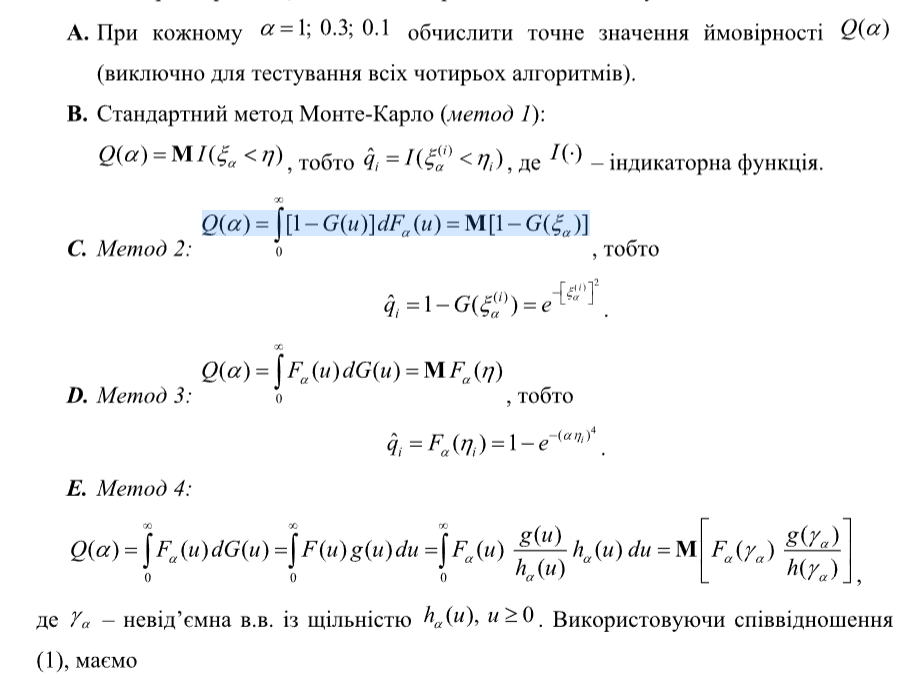

In [ ]:

def compute_integral(alpha):
    integrand = lambda u, alpha: (1 - np.exp(-(alpha * u)**4)) * 2 * u * np.exp(-u**2)
    result, _ = spi.quad(integrand, 0, np.inf, args=(alpha,))
    return result

 
Q_1= compute_integral(1)
Q_03= compute_integral(0.3)
Q_01= compute_integral(0.1)

print(f"Значення інтегралу для a = 1: {Q_1}")
print(f"Значення інтегралу для a = 0.3: {Q_03}")
print(f"Значення інтегралу для a = 0.1: {Q_01}")

    

Значення інтегралу для a = 1: 0.45435863923495345
Значення інтегралу для a = 1: 0.015470119571053638
Значення інтегралу для a = 1: 0.00019988011983236367


In [ ]:
omega_xi = np.random.uniform(0, 1, 100000)
omega_eta = np.random.uniform(0, 1, 100000)

def xi_eta(alpha):

    xi = 1/alpha * (-np.log(omega_xi))**0.25
    eta = (-np.log(omega_eta))**0.5
    return xi, eta

xi, eta = xi_eta(1)


C:\Users\valer\AppData\Local\Temp\ipykernel_5592\3114751790.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  return prob.mean(), prob.var(ddof=1)
c:\python\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


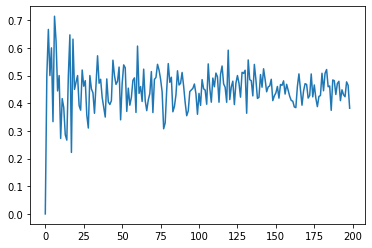

In [187]:
def compute_MC(a, n_sample=10_000, n=1):
    o1 = np.random.rand(n, n_sample)
    o2 = np.random.rand(n, n_sample)
    
    xi = (-np.log(o1)) ** (1/4) / a
    eta = (-np.log(o2)) ** (1/2)
    
    tmp = (xi < eta)
    prob = tmp.mean(axis=1)
    return prob.mean(), prob.var(ddof=1)
Q = [ ]

for i in range(1, 200):
    Q.append(compute_MC(1, i)[0])
plt.plot(Q)

In [ ]:
z, e = 2.575, 0.01
n_sample = 1000
l, r = 25, 1000
while l <= r:
    m = (l + r) // 2
    Q, sigma = compute_MC(1, n_sample=m, n=1000)
    c1 = (z ** 2) * sigma
    c2 = (e * Q) ** 2
    if n_sample >= (c1 / c2):
        r = m - 1
    else:
        l = m + 1
print(r)

78


In [ ]:
sigma_hat = np.sqrt(var_hat)
z = 2.575
margin = z * sigma_hat / np.sqrt(n)
CI_low = Q_hat - margin
CI_high= Q_hat + margin
